In [3]:
from tortus import Tortus
import pandas as pd
import os


In [4]:
def annotate_tweets(path, text_column = "annotate_text", num_records=100, prev_annotations = None, additional_labels = []):
    df = pd.read_csv(path)
    output_path = create_path(path, "second_annotation", True)
    
    if os.path.exists(output_path):
        print(f"Annotations already exist for: {output_path}, adding to these annotations")
        prev_annotations = pd.read_csv(output_path, index_col = "Unnamed: 0")
        
    tortus = Tortus(df, "annotate_text", num_records=num_records, annotations=prev_annotations, labels=["full_standard_english", "not-syntactic_standard_english", "non_standard_english", "code-switched", "some_english", "not_english"] + additional_labels, id_column = "id_column")
    tortus.annotate()
    return tortus

def create_path(path, new_first_dir_name, makedirs = False):
    temp_path_list = os.path.dirname(path).split('/')
    temp_path_list[0] = new_first_dir_name
    outdirs = '/'.join(temp_path_list)
    basename = os.path.basename(path)
    if makedirs:
        os.makedirs(outdirs, exist_ok = True)
    return os.path.join(outdirs, basename)

def merge_and_save_annotations(tortus, first_annotation_path):
    
    first_annotation = pd.read_csv(first_annotation_path, index_col = "Unnamed: 0")
    first_annotation = first_annotation.rename(columns = {'label': 'label_1', 'annotated_at': 'annotated_at_1'})
    
    second_annotation = tortus.annotations
    second_annotation.to_csv(create_path(first_annotation_path, "second_annotation", True))
    second_annotation = second_annotation.rename(columns = {'label': 'label_2', 'annotated_at': 'annotated_at_2'})

    original = pd.read_csv(create_path(first_annotation_path, "data"), index_col = "Unnamed: 0")
    
    merged = first_annotation.merge(original, how = "left", left_on = "id_column", right_on = "id")
    merged = merged.merge(second_annotation, how = "left", on = "id_column")
    merged = merged[["id_column", "rawContent","cleaned_content", "label_1", "label_2", "english_relative_frequency", "date", "annotated_at_1", "annotated_at_2"]]
    merged.to_csv(create_path(first_annotation_path, "complete_annotation", True))
    
    return merged

In [5]:
first_annotation_path = "control_tests/control_manahil.csv"
tortus = annotate_tweets(first_annotation_path, num_records = 100)

Output()

In [6]:
# output_df = merge_and_save_annotations(tortus, first_annotation_path)
tortus.anno

FileNotFoundError: [Errno 2] No such file or directory: 'data/control_manahil.csv'

In [2]:
output_df

NameError: name 'output_df' is not defined

In [32]:
filtered = output_df[(output_df['label_1'] != None) & (output_df['label_2'] != None) & (output_df['label_1'].notna())& (output_df['label_2'].notna())]

In [33]:
label_order = ['full_standard_english', 'not-syntactic_standard_english', 'non_standard_english', 'code-switched', 'some_english', 'not_english']

df_confusion = pd.crosstab(filtered.label_2, filtered.label_1).reindex(label_order)[label_order]
# pd.crosstab(filtered.label_2, filtered.label_1)
df_confusion = df_confusion[label_order].fillna(0)
df_confusion

label_1,full_standard_english,not-syntactic_standard_english,non_standard_english,code-switched,some_english,not_english
label_2,,,,,,
full_standard_english,0,0,1,0,0,0
not-syntactic_standard_english,1,1,3,2,0,0
non_standard_english,0,4,24,0,0,0
code-switched,0,0,1,51,8,0
some_english,0,0,0,3,20,9
not_english,0,0,0,1,0,15


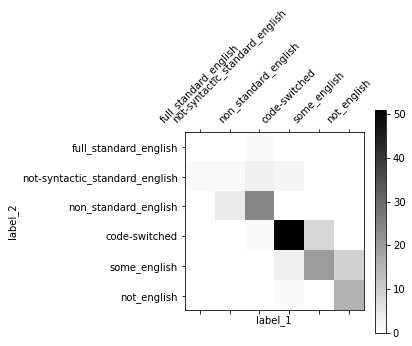

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

# df_confusion = pd.crosstab(y_actu, y_pred)
plot_confusion_matrix(df_confusion)

In [36]:
same = pd.Series(np.diag(df_confusion), index=[df_confusion.index, df_confusion.columns])
same.sum()

111

In [38]:
df_confusion.sum().sum()

144

In [39]:
111/144

0.7708333333333334